# CSE343: Machine Learning Assignmnet 1

## Section C (Algorithm implementation using packages)

Q3. Implementation of linear regression using libraries:- Split the dataset into 80:20 (train:test)

Dataset: [CO2 Emissions Dataset](https://drive.google.com/file/d/1QYlUPgrXR-8GWr4HYR3iDD_I4HpTBisi/view?usp=sharing)

* Importing the required libraries

In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

* Reading the dataset

In [203]:
data = pd.read_csv('CO2 Emissions.csv')
new_data = data.drop(['Make', 'Model','Vehicle Class', 'Transmission', 'Fuel Type'], axis = 1)
scaled_data = StandardScaler().fit_transform(new_data)
# new_data = StandardScaler().fit_transform(new_data)
headers = ['Engine Size(L)', 'Cylinders',
       'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)']
categorical_data = data[['Make', 'Model','Vehicle Class', 'Transmission', 'Fuel Type']]
data.head()
# headers


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [204]:
data['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [205]:
data['Model'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [206]:
data['Vehicle Class'].unique()


array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [207]:
data['Transmission'].unique()


array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [208]:
data['Fuel Type'].unique()


array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [209]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

The given data doesn't have any null data in the dataframe.

In [210]:
# x = data[['Engine Size(L)']]
# y = data[['CO2 Emissions(g/km)']]

In [211]:
# plt.scatter(x, y, color='blue')
# plt.xlabel('Engine Size(L)')
# plt.ylabel('CO2 Emissions(g/km)')

## Part A.
## • Scatter plots of the dataset.
  
1. Scatter Plot is a graph in which the values of two variables are plotted along two axes, the pattern of the resulting points revealing any correlation present.

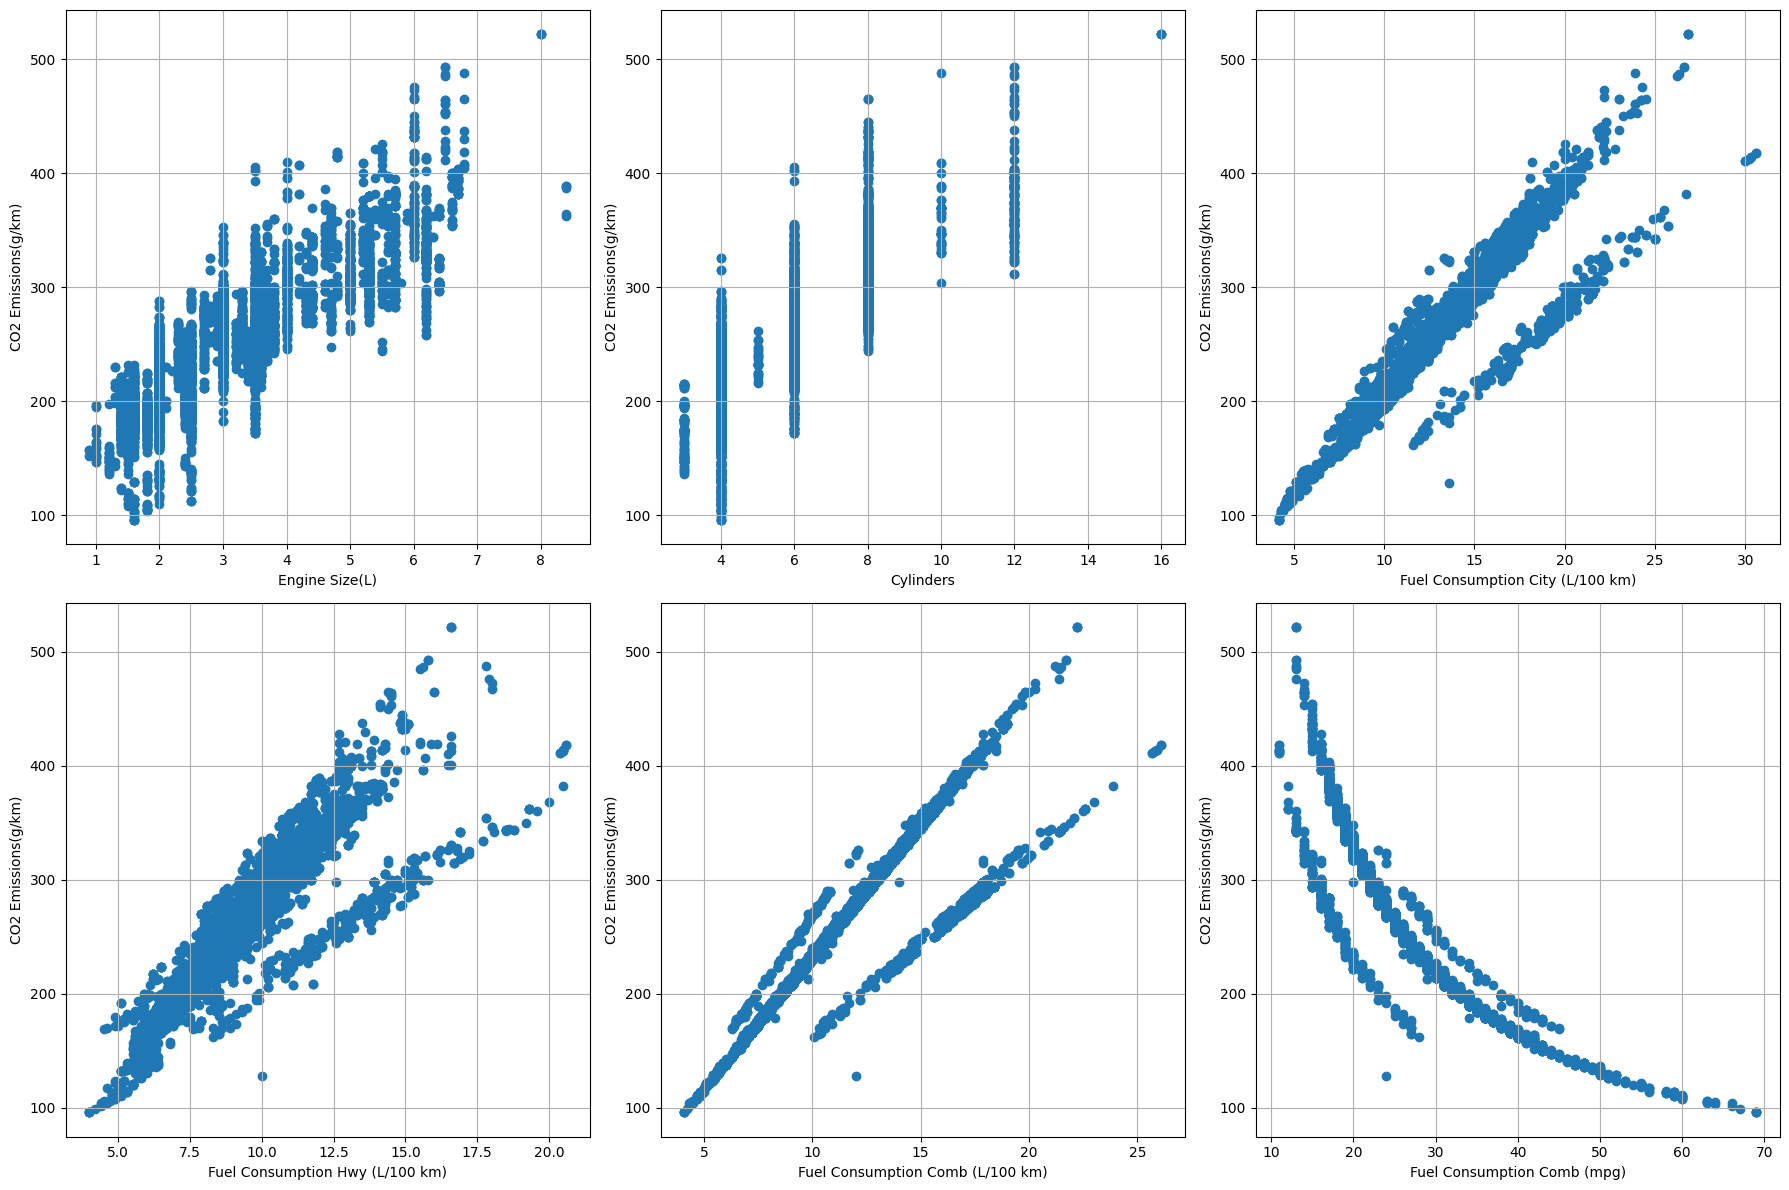

In [212]:
fig, axis = plt.subplots(2, 3, figsize=(18, 12))

axis[0, 0].scatter(data['Engine Size(L)'], data['CO2 Emissions(g/km)'])
axis[0, 0].set(xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)')
axis[0, 0].grid(True)

axis[0, 1].scatter(data['Cylinders'], data['CO2 Emissions(g/km)'])
axis[0, 1].set(xlabel='Cylinders', ylabel='CO2 Emissions(g/km)')
axis[0, 1].grid(True)

axis[0, 2].scatter(data['Fuel Consumption City (L/100 km)'], data['CO2 Emissions(g/km)'])
axis[0, 2].set(xlabel='Fuel Consumption City (L/100 km)', ylabel='CO2 Emissions(g/km)')
axis[0, 2].grid(True)

axis[1, 0].scatter(data['Fuel Consumption Hwy (L/100 km)'], data['CO2 Emissions(g/km)'])
axis[1, 0].set(xlabel='Fuel Consumption Hwy (L/100 km)', ylabel='CO2 Emissions(g/km)')
axis[1, 0].grid(True)

axis[1, 1].scatter(data['Fuel Consumption Comb (L/100 km)'], data['CO2 Emissions(g/km)'])
axis[1, 1].set(xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)')
axis[1, 1].grid(True)

axis[1, 2].scatter(data['Fuel Consumption Comb (mpg)'], data['CO2 Emissions(g/km)'])
axis[1, 2].set(xlabel='Fuel Consumption Comb (mpg)', ylabel='CO2 Emissions(g/km)')
axis[1, 2].grid(True)

plt.tight_layout() #to automatically adjust subplot parameters without overlapping
plt.show()


## • Pair Plots of the dataset.

1. A pairs plot allows us to see both distribution of single variables and relationships between two variables.
2. If the parameter is crowded at a particular value, it is not suitable for regression analysis.



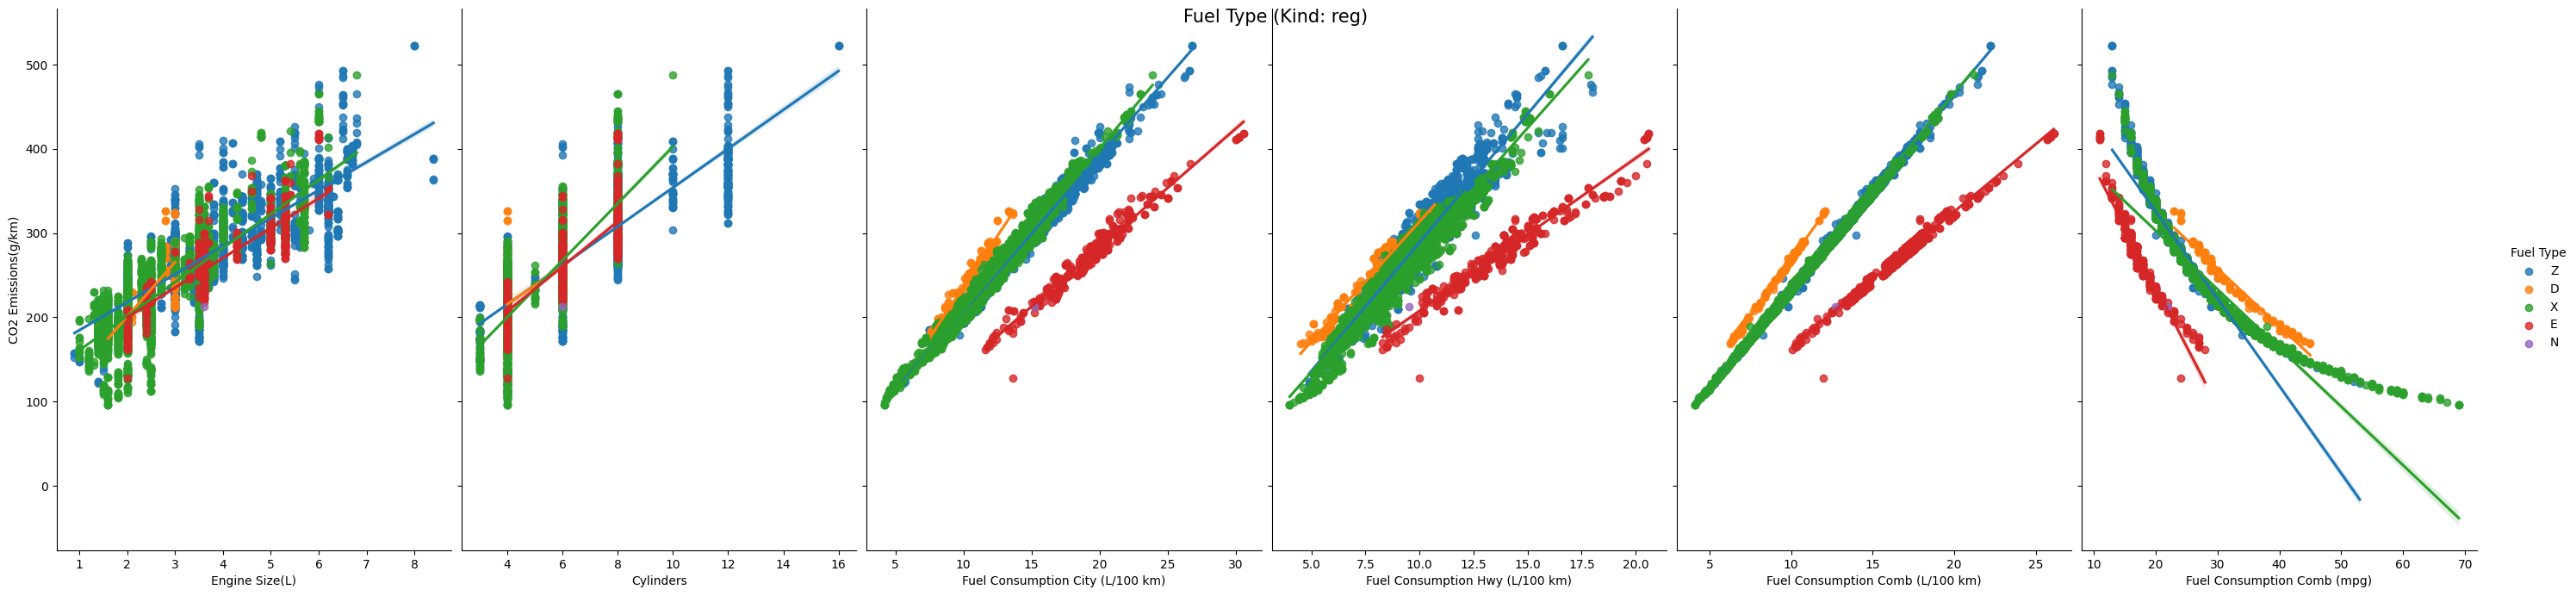

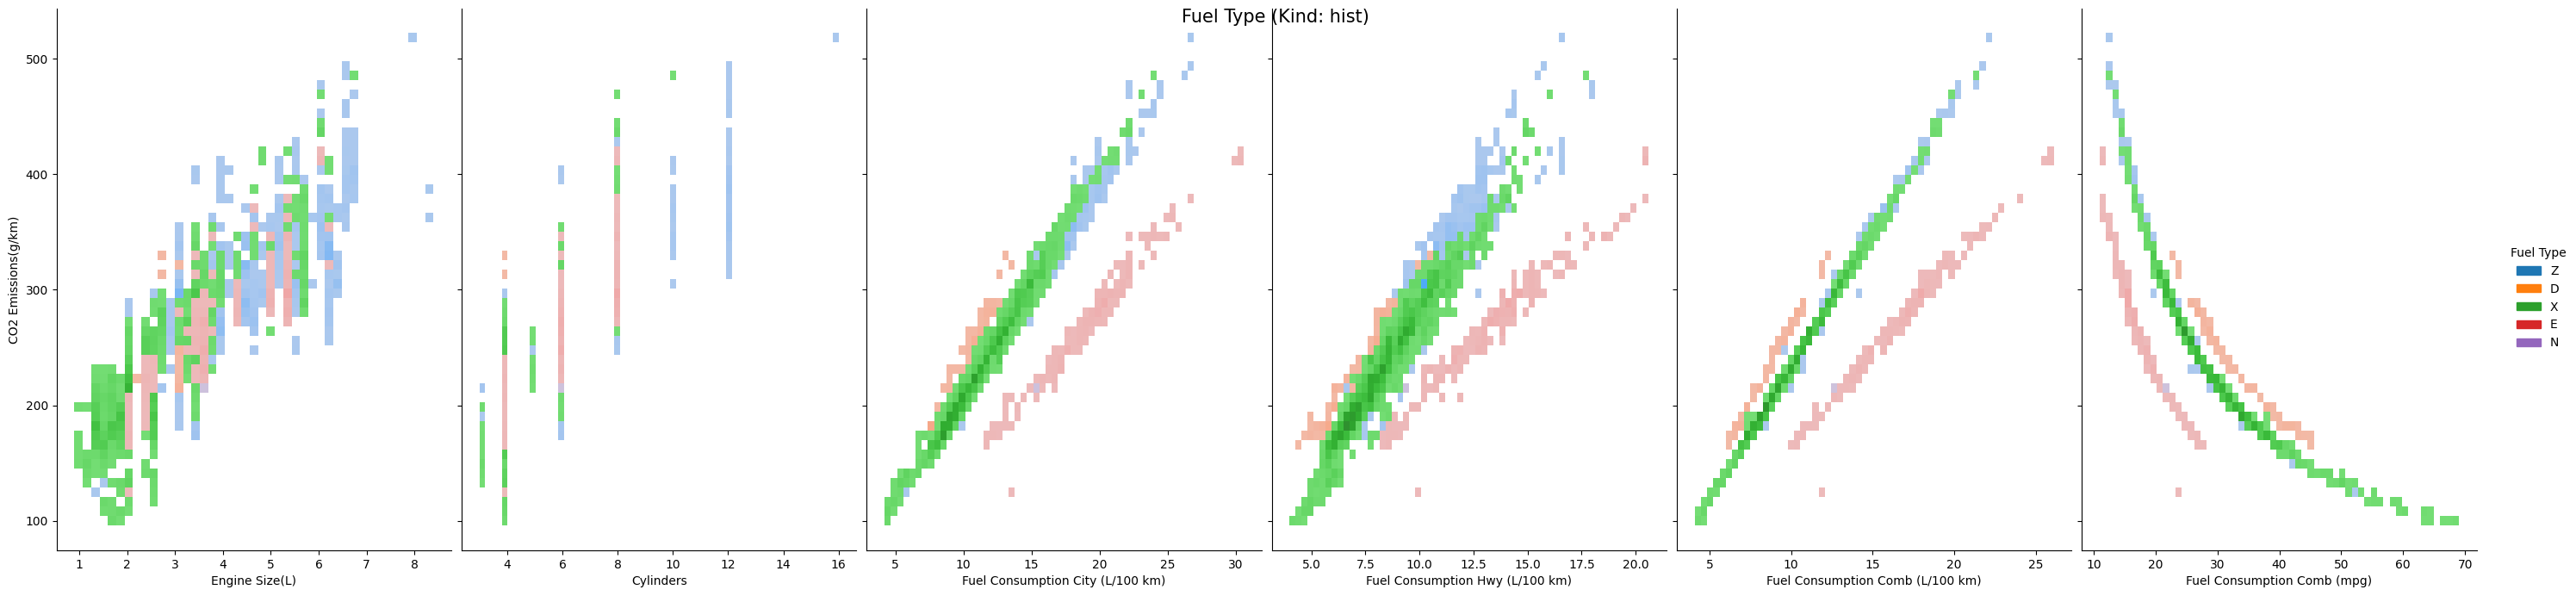

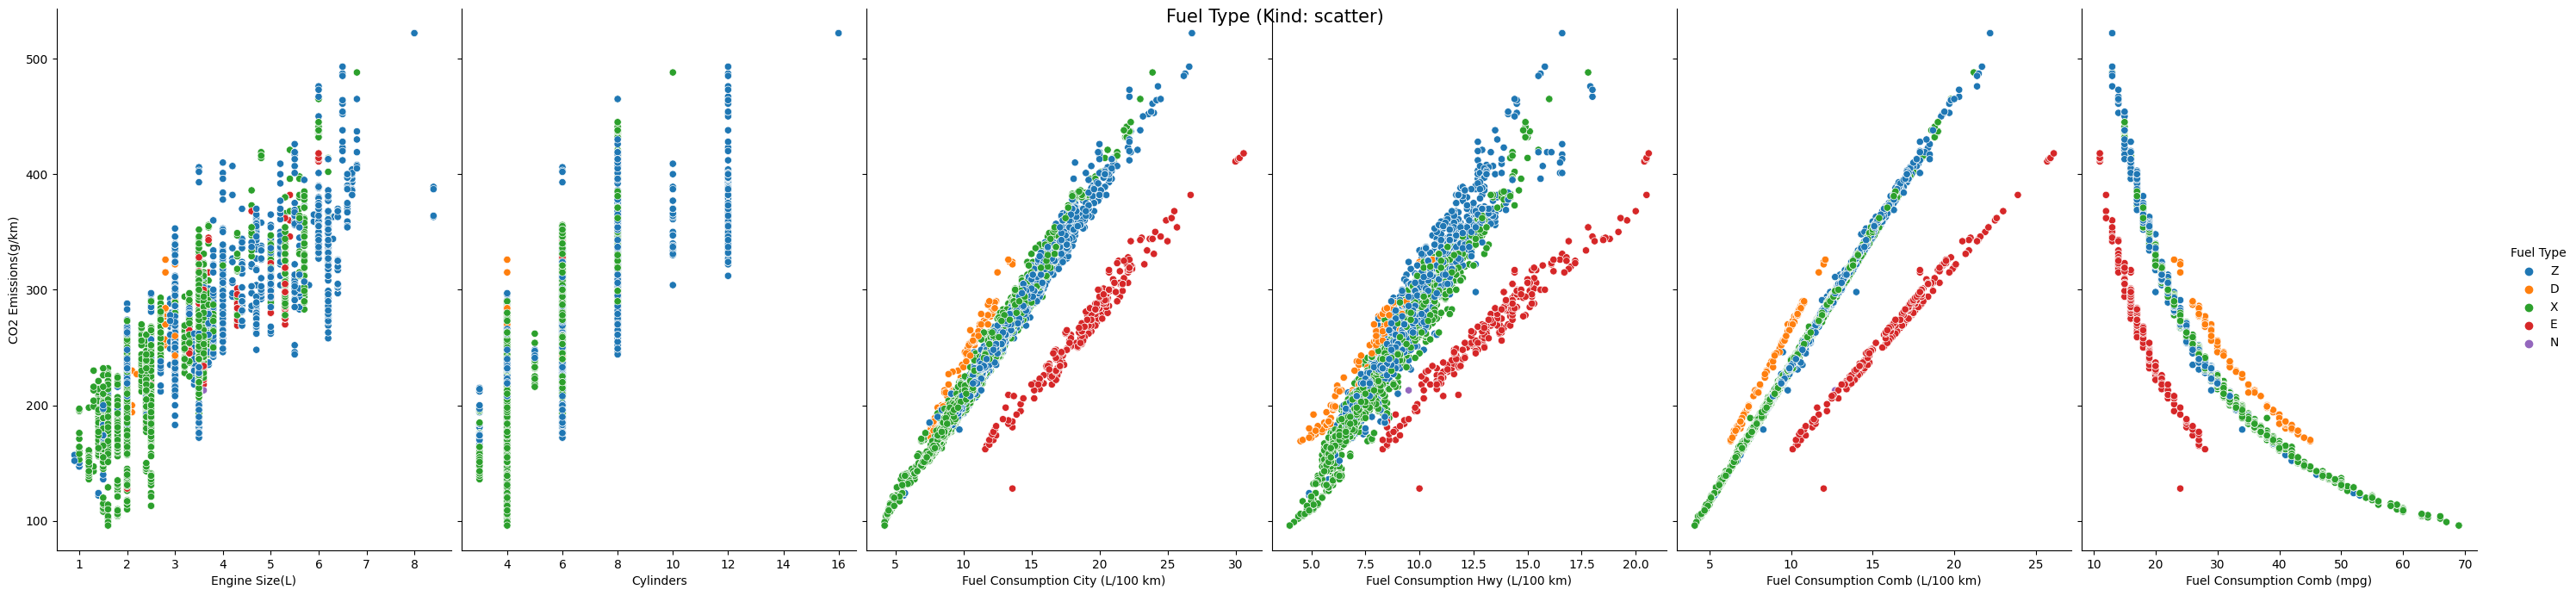

In [213]:
#List of Pair Plot Types ('kde' also)
pptypes = ['reg', 'hist', 'scatter']

for kind in pptypes:
    sns.pairplot(data, x_vars=headers, y_vars='CO2 Emissions(g/km)', height=7, aspect=0.7, kind=kind, hue='Fuel Type')
    # sns.pairplot(data, x_vars=headers, y_vars='CO2 Emissions(g/km)', height=7, aspect=0.7, kind=kind, hue='Transmission')
    plt.suptitle(f'Fuel Type (Kind: {kind})', fontsize=15)
    plt.show()

### • Box plots of the dataset. (aka Box and Whisker Plot)
1. It helps us to vizualize the distribution of the data by quartile, outliners and median.
  

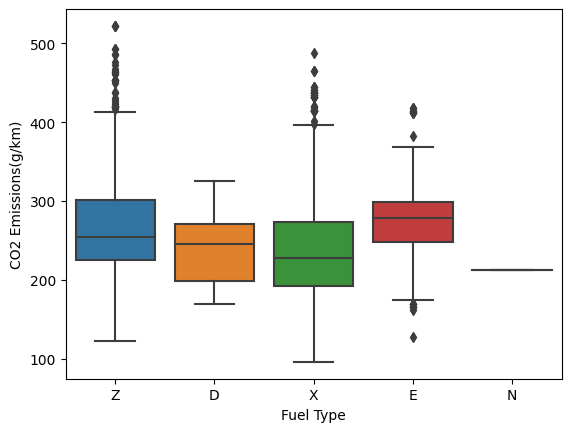

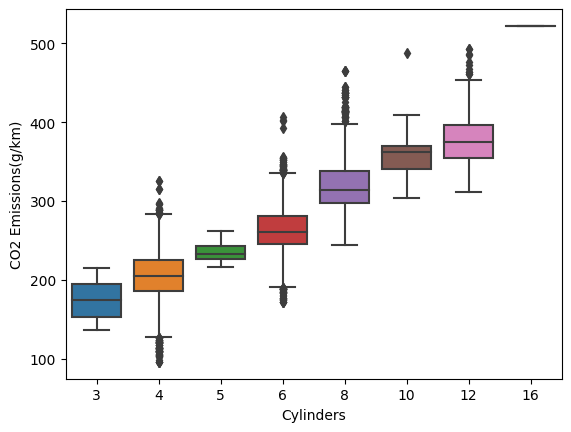

In [214]:
sns.boxplot(data=data, x='Fuel Type', y='CO2 Emissions(g/km)')
plt.show()
sns.boxplot(data=data, x='Cylinders', y='CO2 Emissions(g/km)')
plt.show()

# Dropped other categorical columns because of intense unique values

Correlation Heatmap of the dataset.
> 1. A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types.
> 2. It is very important in Feature Selection.

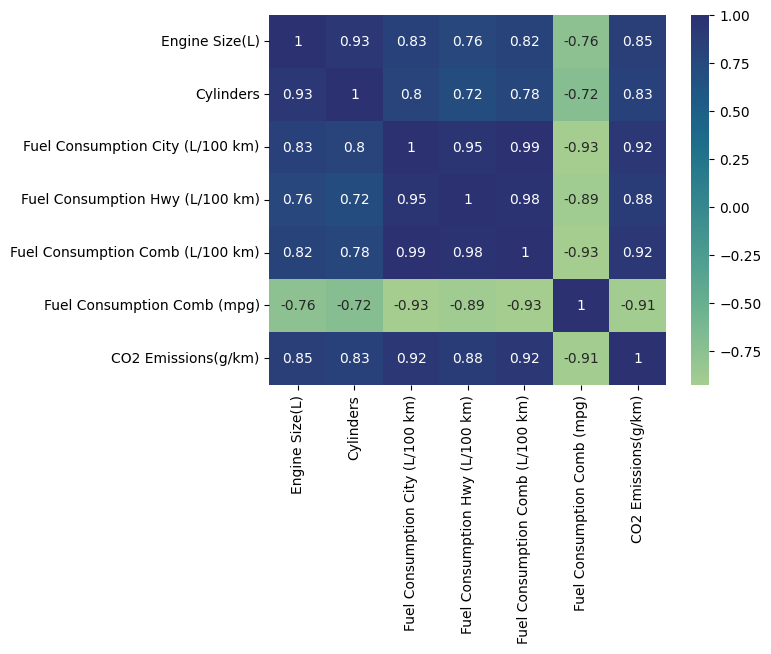

In [215]:
correlation = new_data.corr() #corr() is used to identify the realtionships between variables. It generates a correlation matrix.
sns.heatmap(correlation, cmap='crest', annot=True)
plt.show()

### • Histogram
> 1. A histogram is a graphical display of data using bars of different heights.
> 2. In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range.

In [216]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


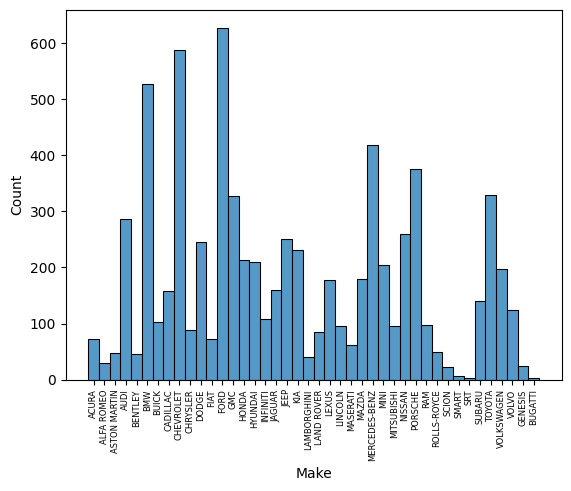

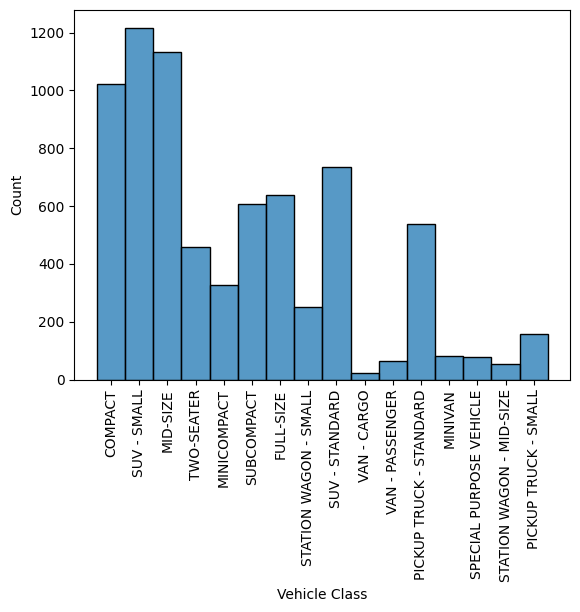

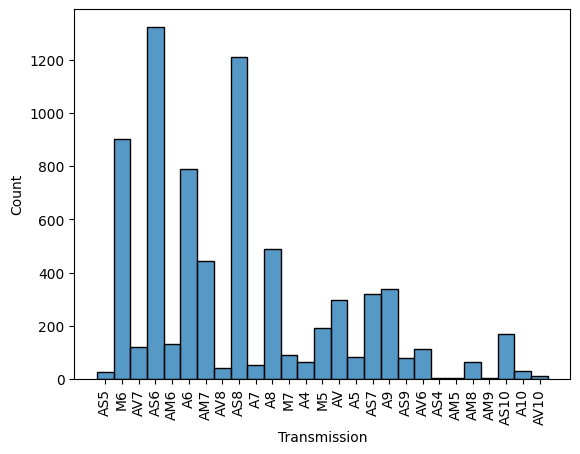

In [217]:
sns.histplot(data=data, x='Make')
plt.xticks(rotation=90, fontsize=6)
plt.show()
# sns.histplot(data=data, x='Model')
# plt.xticks(rotation=90)
# plt.show()
sns.histplot(data=data, x='Vehicle Class')
plt.xticks(rotation=90)
plt.show()
sns.histplot(data=data, x='Transmission')
plt.xticks(rotation=90)
plt.show()

#Dropped other categorical columns because of high unique values.

### • Pie Chart of the dataset.
> 1. A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion.

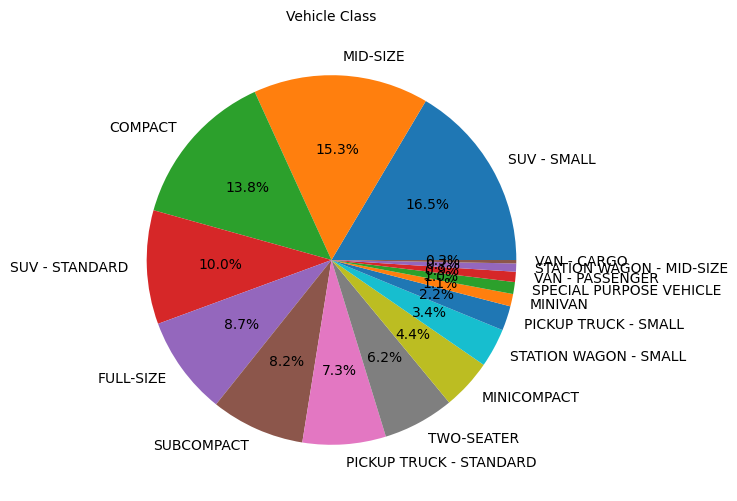

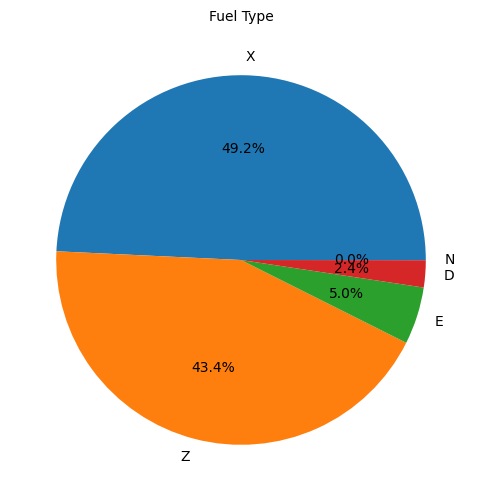

In [218]:
plt.figure(figsize=(6, 6))
plt.pie(data['Vehicle Class'].value_counts(), labels=data['Vehicle Class'].value_counts().index, autopct='%1.1f%%')
plt.title('Vehicle Class', fontsize=10)
plt.show()

# plt.figure(figsize=(8, 8))
# plt.pie(data['Transmission'].value_counts(), labels=data['Transmission'].value_counts().index, autopct='%1.1f%%')
# plt.title('Transmission', fontsize=10)
# plt.show()

plt.figure(figsize=(6, 6))
plt.pie(data['Fuel Type'].value_counts(), labels=data['Fuel Type'].value_counts().index, autopct='%1.1f%%')
plt.title('Fuel Type', fontsize=10)
plt.show()

#Dropped other categorical columns because of high unique values.

### Insights:
1. Categorical Values like Make and Model have very high unique data points so it can be dropped and will have very minimal effect on the models.
2. The scatter plots show a positive linear relationship between two numerical variables.
3. Box plots indicate the presence of outliers in certain numerical features.
4. Histograms reveal that a particular numerical feature follows a skewed distribution.
5. Categorical distribution plots display an imbalanced distribution among categories.
6. The correlation heatmap highlights a strong positive correlation between two numerical variables.

## Part B.

### TSNE (t-distributed stochastic neighbour embedding)

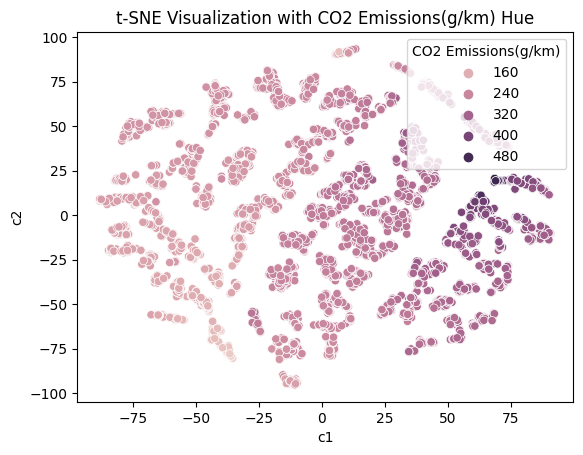

In [219]:
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(scaled_data) #this fits the transformation model to the input data (scaled_data) and then applies the transformation to the data, returning the transformed dataset.
tsne_df = pd.DataFrame(tsne_data, columns=['c1', 'c2'])
sns.scatterplot(x='c1', y='c2', data=tsne_df, hue= data['CO2 Emissions(g/km)'])
plt.title('t-SNE Visualization with CO2 Emissions(g/km) Hue')
plt.show()


### Insight on t-SNE

1. t-SNE is effective at revealing separability in data when the data is high-dimensional, leading to well separated clusters after dimensionality reduction.
2. It may not perform well when data lacks clear clusters or have noise, resulting in fuzzy clusters.

### Observation:
Here we can see clear cluster formation of the dataframes. Hence, we can conclude that this dataset can be further used to prepare ml model. Otherwise, in case of bad clustering and more noise, we avoid to further proceed on creating models and focus more on preprocessing of the data.

## Part C.


Preprocessing on the data

In [220]:
x = data.drop("CO2 Emissions(g/km)", axis=1)
y = data["CO2 Emissions(g/km)"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

encoder = LabelEncoder()
x_train['Make'] = encoder.fit_transform(x_train['Make'])
x_train['Model'] = encoder.fit_transform(x_train['Model'])
x_train['Vehicle Class'] = encoder.fit_transform(x_train['Vehicle Class'])
x_train['Transmission'] = encoder.fit_transform(x_train['Transmission'])
x_train['Fuel Type'] = encoder.fit_transform(x_train['Fuel Type'])

x_test['Make'] = encoder.fit_transform(x_test['Make'])
x_test['Model'] = encoder.fit_transform(x_test['Model'])
x_test['Vehicle Class'] = encoder.fit_transform(x_test['Vehicle Class'])
x_test['Transmission'] = encoder.fit_transform(x_test['Transmission'])
x_test['Fuel Type'] = encoder.fit_transform(x_test['Fuel Type'])

In [221]:
x_train.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
1095,3,213,10,2.0,4,8,4,10.1,7.5,8.9,32
3538,9,1542,6,5.3,8,3,1,19.7,13.9,17.1,17
2377,8,330,0,2.5,4,17,3,10.6,7.3,9.1,31
3414,5,256,0,4.4,8,17,4,14.7,9.7,12.5,23
880,32,171,3,3.4,6,26,4,12.4,8.6,10.7,26


In [222]:
#Scaling the data
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

#We typically scale only the input features (x) because scaling the target variable (y) may alter its interpretation and evaluation metrics, which are based on the original scale of y.

#The code scales the features in both the training and test datasets independently, ensuring that they have zero mean and unit variance.
#It's important to fit and transform each dataset separately to prevent data leakage from the test set to the training set.

X_train = x_train #used in part g
X_test = x_test #used in part g
Y_test = y_test #used in part g
Y_train = y_train #used in part g

model = LinearRegression()
model.fit(x_train, y_train)

y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

n_train = len(y_train) #number of datapoints (training)
n_test = len(y_test) #number of datapoints (testing)
p_train = x_train.shape[1] #training set features dimentionality
p_test = x_test.shape[1] #testing set features dimentionality

print('Train set metrics')
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2 Score:', metrics.r2_score(y_train, y_train_pred))
print('Adjusted R2 Score:', 1 - ((1-metrics.r2_score(y_train, y_train_pred))*(n_train-1)/(n_train-p_train-1)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Accuracy:', model.score(x_train, y_train)*100, '%')

print('\nTest set metrics')
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_test_pred))
print('Adjusted R2 Score:', 1 - ((1-metrics.r2_score(y_test, y_test_pred))*(n_test-1)/(n_test-p_test-1)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Accuracy:', model.score(x_test, y_test)*100, '%')

Train set metrics
Mean Squared Error: 285.8901655194361
Root Mean Squared Error: 16.908286888961758
R2 Score: 0.9164709697704508
Adjusted R2 Score: 0.9163151320274853
Mean Absolute Error: 11.0699529734518
Accuracy: 91.64709697704508 %

Test set metrics
Mean Squared Error: 317.4664749909796
Root Mean Squared Error: 17.81758892193272
R2 Score: 0.9073258800490117
Adjusted R2 Score: 0.9066300334145674
Mean Absolute Error: 11.423256847158251
Accuracy: 90.73258800490117 %


## Part D.

## PCA

In [223]:
for i in range(4,12,2):
    pca = PCA(n_components=i)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)

    model = LinearRegression()
    model.fit(x_train_pca, y_train)

    y_test_pred = model.predict(x_test_pca)
    y_train_pred = model.predict(x_train_pca)

    n_train = len(y_train) #number of datapoints (training)
    n_test = len(y_test) #number of datapoints (testing)
    p_train = x_train_pca.shape[1] #training set features dimentionality
    p_test = x_test_pca.shape[1] #testing set features dimentionality

    print(f'\nFor N={i}')
    print('----------------------------------')
    print(f'Train set metrics')
    print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
    print('R2 Score:', metrics.r2_score(y_train, y_train_pred))
    print('Adjusted R2 Score:', 1 - ((1-metrics.r2_score(y_train, y_train_pred))*(n_train-1)/(n_train-p_train-1)))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))
    print('Accuracy:', model.score(x_train_pca, y_train)*100)
    print('----------------------------------')
    print('Test set metrics')
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
    print('R2 Score:', metrics.r2_score(y_test, y_test_pred))
    print('Adjusted R2 Score:', 1 - ((1-metrics.r2_score(y_test, y_test_pred))*(n_test-1)/(n_test-p_test-1)))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
    print('Accuracy:', model.score(x_test_pca, y_test)*100)
    print('----------------------------------')


For N=4
----------------------------------
Train set metrics
Mean Squared Error: 303.8928264328678
Root Mean Squared Error: 17.432522090416747
R2 Score: 0.911211100810222
Adjusted R2 Score: 0.9111509355388754
Mean Absolute Error: 11.814640746145644
Accuracy: 91.12111008102221
----------------------------------
Test set metrics
Mean Squared Error: 332.61255251693336
Root Mean Squared Error: 18.2376685055117
R2 Score: 0.9029044701805615
Adjusted R2 Score: 0.9026406236321391
Mean Absolute Error: 11.988212275546745
Accuracy: 90.29044701805616
----------------------------------

For N=6
----------------------------------
Train set metrics
Mean Squared Error: 300.23963788932804
Root Mean Squared Error: 17.32742444477332
R2 Score: 0.9122784593034152
Adjusted R2 Score: 0.9121892660744406
Mean Absolute Error: 11.810816362443703
Accuracy: 91.22784593034152
----------------------------------
Test set metrics
Mean Squared Error: 329.992217794494
Root Mean Squared Error: 18.165687925165233
R2 Scor

### Insights

• As we increase the number of components, the accuracy of the model increases.

• The accuracy of the model is highest when the number of components is 10.

• The accuracy of the model is lowest when the number of components is 4.

• We will discuss about overfitting in further parts below.

## Part E

In [230]:
data=pd.read_csv("CO2 Emissions.csv")
categorical_data = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

oneHotEncoder = OneHotEncoder(sparse_output=False, drop='first')
#sparse_output: It specifies that the output of OneHotEncoder should be a dense matrix instead of a sparse matrix.
#drop: Drops the first category in each feature to avoid multicollinearity in one-hot encoded features, which is often used in linear models.

encoded_cols = oneHotEncoder.fit_transform(data[categorical_data])
encoded_df = pd.DataFrame(encoded_cols, columns=oneHotEncoder.get_feature_names_out(categorical_data))
new_data = pd.concat([data, encoded_df], axis=1)

new_data.drop(categorical_data, axis=1, inplace=True)

x = new_data.drop("CO2 Emissions(g/km)", axis=1)
y = new_data["CO2 Emissions(g/km)"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)

y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

n_train = len(y_train) #number of datapoints (training)
n_test = len(y_test) #number of datapoints (testing)
p_train = x_train.shape[1] #training set features dimentionality
p_test = x_test.shape[1] #testing set features dimentionality

print('Train set metrics')
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2 Score:', metrics.r2_score(y_train, y_train_pred))
print('Adjusted R2 Score:', 1 - ((1-metrics.r2_score(y_train, y_train_pred))*(n_train-1)/(n_train-p_train-1)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Accuracy:', model.score(x_train, y_train)*100)

print('\nTest set metrics')
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_test_pred))
print('Adjusted R2 Score:', 1 - ((1-metrics.r2_score(y_test, y_test_pred))*(n_test-1)/(n_test-p_test-1)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Accuracy:', model.score(x_test, y_test)*100)


Train set metrics
Mean Squared Error: 8.781171936372138
Root Mean Squared Error: 2.9633042260915663
R2 Score: 0.9974343896202535
Adjusted R2 Score: 0.9959726121410677
Mean Absolute Error: 1.929030403545279
Accuracy: 99.74343896202535

Test set metrics
Mean Squared Error: 3.194788632517709e+19
Root Mean Squared Error: 5652246130.979886
R2 Score: -9326157193650528.0
Adjusted R2 Score: 2.0606898230281708e+16
Mean Absolute Error: 919345348.4739655
Accuracy: -9.326157193650528e+17


### Insights:

• As we can clearly see the overfitting of the model, we can conclude that one hot encoding is not suitable for this dataset.

• The immense rmse and r2 score of the test set is due to the overfitting of the model.


## Part F.

In [231]:
for i in [10, 50, 100, 500, 1000, 1500, 2000]:
    pca = PCA(n_components=i)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)

    model = LinearRegression()
    model.fit(x_train_pca, y_train)

    y_test_pred = model.predict(x_test_pca)
    y_train_pred = model.predict(x_train_pca)

    n_train = len(y_train) #number of datapoints (training)
    n_test = len(y_test) #number of datapoints (testing)
    p_train = x_train_pca.shape[1] #training set features dimentionality
    p_test = x_test_pca.shape[1] #testing set features dimentionality

    print(f'\nFor N={i}')
    print('----------------------------------')
    print(f'Train set metrics')
    print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
    print('R2 Score:', metrics.r2_score(y_train, y_train_pred))
    print('Adjusted R2 Score:', 1 - ((1-metrics.r2_score(y_train, y_train_pred))*(n_train-1)/(n_train-p_train-1)))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))
    print('Accuracy:', model.score(x_train_pca, y_train)*100)
    print('----------------------------------')
    print('Test set metrics')
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
    print('R2 Score:', metrics.r2_score(y_test, y_test_pred))
    print('Adjusted R2 Score:', 1 - ((1-metrics.r2_score(y_test, y_test_pred))*(n_test-1)/(n_test-p_test-1)))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
    print('Accuracy:', model.score(x_test_pca, y_test)*100)
    print('----------------------------------')


For N=10
----------------------------------
Train set metrics
Mean Squared Error: 318.9972575556904
Root Mean Squared Error: 17.86049432562521
R2 Score: 0.9067980127224731
Adjusted R2 Score: 0.9066399628881886
Mean Absolute Error: 11.422064236739313
Accuracy: 90.6798012722473
----------------------------------
Test set metrics
Mean Squared Error: 332.1828967112781
Root Mean Squared Error: 18.225885347803494
R2 Score: 0.9030298943648697
Adjusted R2 Score: 0.9023684338898688
Mean Absolute Error: 11.390642280420433
Accuracy: 90.30298943648697
----------------------------------

For N=50
----------------------------------
Train set metrics
Mean Squared Error: 106.13165738592912
Root Mean Squared Error: 10.302022004729418
R2 Score: 0.96899132783391
Adjusted R2 Score: 0.9687266132004279
Mean Absolute Error: 6.2911794147927464
Accuracy: 96.899132783391
----------------------------------
Test set metrics
Mean Squared Error: 108.44039077127758
Root Mean Squared Error: 10.413471600349116
R2 Sco

### Insights:
• Applying PCA to one-hot encoded categorical variables reduces the number of features, simplifying the model and potentially improving its generalization performance by reducing the risk of overfitting.

• As seen for N=1500, model performs best with accuracy of 99.59876460411795%. Where when we increase N to 2000, accuracy drops drastically to  -9.887830159550731e+19%, because of the overfitting of the model.

> #### Conclusion: the model performs best for N=1500.


## Part G.
### L1 and L2 regularization

In [232]:
linearModel = LinearRegression()
linearModel.fit(X_train, Y_train)

lassoModel = Lasso(alpha=0.1)
lassoModel.fit(X_train, Y_train)

ridgeModel = Ridge(alpha=0.1)
ridgeModel.fit(X_train, Y_train)

# Function to calculate metrics
def calculate_metrics(a, b, modelType):
    mse = mean_squared_error(a, b)
    rmse = np.sqrt(mse)
    r2 = r2_score(a, b)
    n_train = len(a)
    p_train = X_train.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n_train - 1) / (n_train - p_train - 1))
    mae = mean_absolute_error(a, b)
    accuracy = r2*100
    print(f'\n{modelType} Model Metrics')
    print('----------------------------------')
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('R2 Score:', r2)
    print('Adjusted R2 Score:', adjusted_r2)
    print('Mean Absolute Error:', mae)
    print('Accuracy:', accuracy)
    print('----------------------------------')

# Calculate metrics for each model on both train and test datasets
calculate_metrics(Y_train, linearModel.predict(X_train), 'Linear')
calculate_metrics(Y_test, linearModel.predict(X_test), 'Linear')

calculate_metrics(Y_train, lassoModel.predict(X_train), 'Lasso')
calculate_metrics(Y_test, lassoModel.predict(X_test), 'Lasso')

calculate_metrics(Y_train, ridgeModel.predict(X_train), 'Ridge')
calculate_metrics(Y_test, ridgeModel.predict(X_test), 'Ridge')


Linear Model Metrics
----------------------------------
Mean Squared Error: 285.8901655194361
Root Mean Squared Error: 16.908286888961758
R2 Score: 0.9164709697704508
Adjusted R2 Score: 0.9163151320274853
Mean Absolute Error: 11.0699529734518
Accuracy: 91.64709697704508
----------------------------------

Linear Model Metrics
----------------------------------
Mean Squared Error: 317.4664749909796
Root Mean Squared Error: 17.81758892193272
R2 Score: 0.9073258800490117
Adjusted R2 Score: 0.9066300334145674
Mean Absolute Error: 11.423256847158251
Accuracy: 90.73258800490117
----------------------------------

Lasso Model Metrics
----------------------------------
Mean Squared Error: 286.01368877470134
Root Mean Squared Error: 16.91193923755349
R2 Score: 0.9164348797646811
Adjusted R2 Score: 0.9162789746896152
Mean Absolute Error: 11.06973418738236
Accuracy: 91.64348797646811
----------------------------------

Lasso Model Metrics
----------------------------------
Mean Squared Error: 31

### Insights:

• The models show consistent performance with similar Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values.

• High R2 and adjusted R2 scores indicate the models' ability to explain a significant portion of variance in the target variable and high accuracy.

• Mean Absolute Error (MAE) values indicate that the models have relatively small average prediction errors.

• Regularization techniques (Lasso and Ridge) show similar performance to the standard linear model in this context.

## Part H.

In [233]:
sdg_reg = SGDRegressor(max_iter=1000, random_state=0, alpha=0.01)
sdg_reg.fit(X_train, Y_train)

y_test_pred = sdg_reg.predict(X_test)
y_train_pred = sdg_reg.predict(X_train)

n_train = len(Y_train) #number of datapoints (training)
n_test = len(Y_test) #number of datapoints (testing)
p_train = x_train.shape[1] #training set features dimentionality
p_test = x_test.shape[1] #testing set features dimentionality

print('Train set metrics')
print('Mean Squared Error:', metrics.mean_squared_error(Y_train, y_train_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, y_train_pred)))
print('R2 Score:', metrics.r2_score(Y_train, y_train_pred))
print('Adjusted R2 Score:', 1 - ((1-metrics.r2_score(Y_train, y_train_pred))*(n_train-1)/(n_train-p_train-1)))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train, y_train_pred))
print('Accuracy:', sdg_reg.score(X_train, y_train)*100)

print('\nTest set metrics')
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))
print('R2 Score:', metrics.r2_score(Y_test, y_test_pred))
print('Adjusted R2 Score:', 1 - ((1-metrics.r2_score(Y_test, y_test_pred))*(n_test-1)/(n_test-p_test-1)))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_test_pred))
print('Accuracy:', sdg_reg.score(X_test, Y_test)*100)

Train set metrics
Mean Squared Error: 289.555621675842
Root Mean Squared Error: 17.016333966981314
R2 Score: 0.9154000270273269
Adjusted R2 Score: 0.8671985011029552
Mean Absolute Error: 11.411300979268002
Accuracy: 91.54000270273269

Test set metrics
Mean Squared Error: 319.292257723116
Root Mean Squared Error: 17.868750871930473
R2 Score: 0.9067929015418252
Adjusted R2 Score: 1.2059486187489012
Mean Absolute Error: 11.644577031079605
Accuracy: 90.67929015418252


### Insights:

• SGDRegression and other (Linear, Lasso and Rigde) models almost perform similar with accuracy of nearly 91%

• It is used for large-scale linear regression tasks with potentially millions of data points because it can efficiently optimize linear models. It differs from Lasso and Ridge regression by optimizing linear models using stochastic gradient descent, which is suitable for large datasets, and it doesn't perform L1 or L2 regularization by default unless explicitly specified.